In [1]:
import pymc3 as pm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Corruption perception index and friends
cpi = pd.read_excel("cpi2016.xlsx", 1, header=0)

# GDP per capita
gdp = pd.read_csv("gdp.csv", encoding="latin-1")

cpi = cpi[["Country", "WB Code", "CPI2016"]]

gdp = gdp[["ISO", "2016"]]

df = cpi.merge(gdp, how="inner", left_on="WB Code", right_on="ISO")

del df["WB Code"]

df["2016"] = pd.to_numeric(df["2016"], errors="coerce")

df.dropna(inplace=True)

df.rename(columns={"2016": "GDP2016"}, inplace=True)
df

,Country,CPI2016,ISO,GDP2016
0,Qatar,61,QAT,116055.244
1,Bahrain,43,BHR,47029.734
2,Kuwait,41,KWT,66649.194
3,Cyprus,55,CYP,32418.084
4,Saudi Arabia,46,SAU,51305.594
5,Malta,55,MLT,36977.535
6,Jordan,48,JOR,11372.333
7,Lesotho,39,LSO,3377.965
8,The FYR of Macedonia,37,MKD,13531.575
10,Luxembourg,81,LUX,98049.426


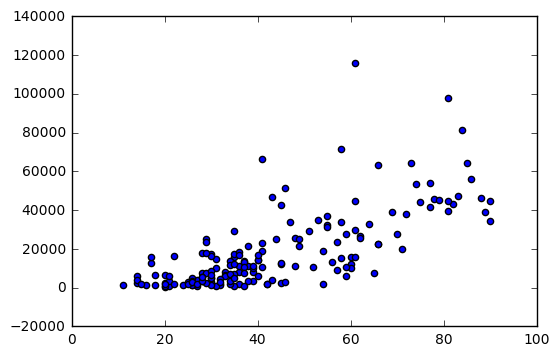

In [3]:
# Exploratory plot

plt.scatter(df["CPI2016"], df["GDP2016"])

In [23]:
# Run the model
# The above exploratory plot is probably indicative of an exponential
# relationship, but PyMC3 doesn't seem to support the exponential
# distribution for GLMs, so we'll 

# Also
data = dict(x=df["CPI2016"].tolist(), y=df["GDP2016"].tolist())

with pm.Model() as model:
    pm.glm.GLM.from_formula("y ~ x", data, family=pm.glm.families.Normal())
    trace = pm.sample(3000, njobs=2, init="advi+adapt_diag", tuning=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 1,963.8:  20%|██        | 40442/200000 [01:29<05:53, 451.17it/s]
Convergence archived at 40500
Interrupted at 40,499 [20%]: Average Loss = 6.6889e+09
100%|██████████| 3500/3500 [00:17<00:00, 198.09it/s]
/home/rikk/anaconda3/envs/stats/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.882434997313, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66b8954080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f66b933b898>]], dtype=object)

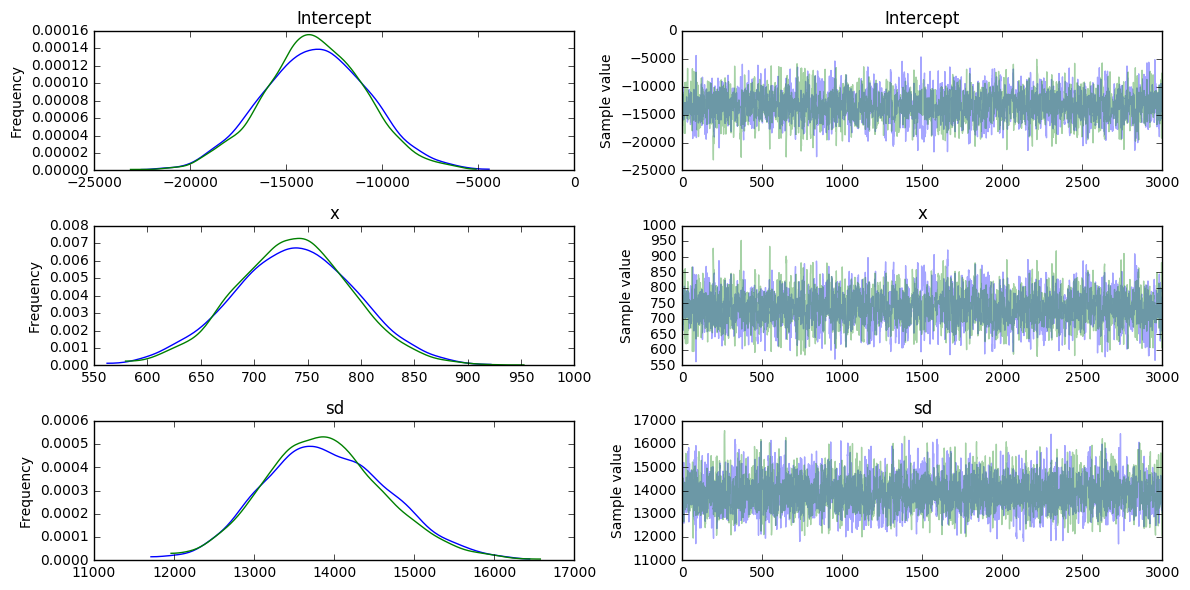

In [24]:
# View the trace

pm.traceplot(trace)

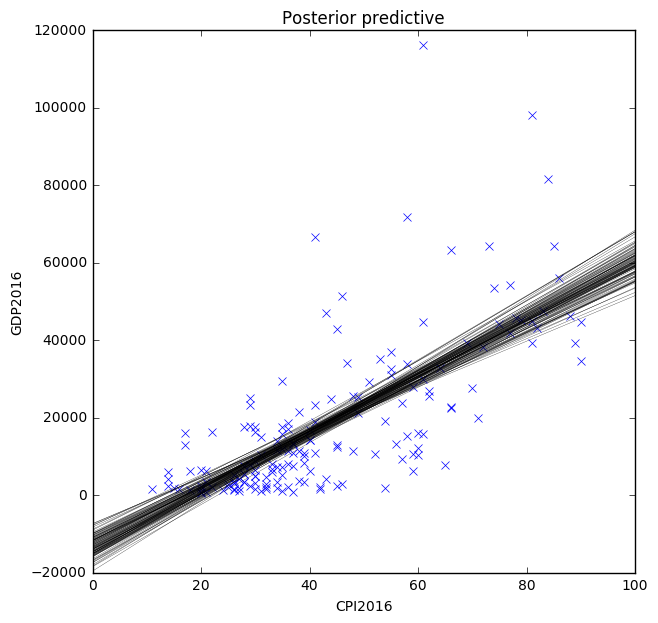

In [25]:
plt.figure(figsize=(7, 7))
plt.plot(df["CPI2016"], df["GDP2016"], 'x', label='data')
# Silly hacky problem with variable names
pm.plot_posterior_predictive_glm(trace, samples=100, eval=np.linspace(0, 100, 100))

plt.xlabel('CPI2016')
plt.ylabel('GDP2016')